<a href="https://colab.research.google.com/github/Kaushal-DCU-2023-25/CA683I_DA_AM_Assignment/blob/main/Kaushal_2024_CA683I_DA_AM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive2
!pip install imblearn

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
sns.set_palette(palette = "Paired")

### Data visualization
- Heat map
- Box plot
- Central Tendency
- Statistical test between 2015 and 2021 data (chi square test)-

In [ ]:
import pandas as pd
import numpy as np

# Read files
file_diabeties = drive.CreateFile({'id':'1MjAoJU98qHEd3NG6ohXdSPTnhHsG12cX'})
file_diabeties.GetContentFile('diabetes_012_health_indicators_BRFSS2015.csv')
df_brfss15_ubal = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

#https://drive.google.com/file/d/1Grz0fdjypwBTBN8GchZ_mh-_aTYNdmBb/view?usp=drive_link
# Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
file_diabeties2 = drive.CreateFile({'id':'1Grz0fdjypwBTBN8GchZ_mh-_aTYNdmBb'})
file_diabeties2.GetContentFile('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_brfss15_bal = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

#https://drive.google.com/file/d/10rkY6BdjNl9MInFViO0FX1NPsfmkQ_2t/view?usp=drive_link
file_diabeties3 = drive.CreateFile({'id':'10rkY6BdjNl9MInFViO0FX1NPsfmkQ_2t'})
file_diabeties3.GetContentFile('diabetes_012_health_indicators_BRFSS2021.csv')
df_brfss21_ubal = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

#https://drive.google.com/file/d/1MeSXN4dxq-_YM-NwnEDELQJJYOa0IxGJ/view?usp=drive_link
file_diabeties4 = drive.CreateFile({'id':'1MeSXN4dxq-_YM-NwnEDELQJJYOa0IxGJ'})
file_diabeties4.GetContentFile('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')
df_brfss21_bal = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')



[0. 2. 1.]
Diabetes
0.0    410894
1.0     10250
2.0     68914
Name: Diabetes, dtype: int64


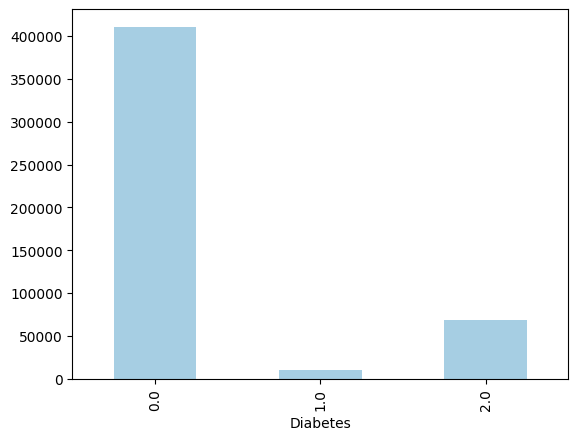

Diabetes
0.0    82179
1.0    68914
Name: Diabetes, dtype: int64


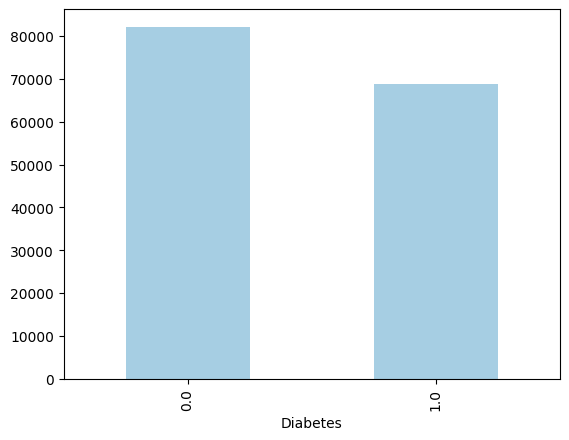

In [ ]:
df_brfss = pd.concat([df_brfss15_ubal, df_brfss21_ubal], axis=0).reset_index(drop=True)
#0 = no diabetes 1 = prediabetes 2 = diabetes
#df_brfss.describe()

# Selected dataset is df_brfss15_ubal and df_brfss21_ubal
df_brfss = df_brfss.rename(columns={"Diabetes_012": "Diabetes"})

# Downsampling unbalanced dataset

# Selected dataset is df_brfss15_bal and df_brfss21_bal
#df_brfss = df_brfss.rename(columns={"Diabetes_binary": "Diabetes"})
print(df_brfss['Diabetes'].unique())
df_brfss.head()

print(df_brfss.groupby('Diabetes')['Diabetes'].count())

df_brfss.groupby('Diabetes')['Diabetes'].count().plot(kind='bar')
plt.show()

#Down sample
df_brfss = df_brfss[df_brfss['Diabetes'] != 1]

df_brfss  = df_brfss.groupby('Diabetes', group_keys=False).apply(lambda df: df.sample(frac=.2) if df.name == 0 else df )

df_brfss['Diabetes'].replace(2.0, 1.0, inplace=True)
print(df_brfss.groupby('Diabetes')['Diabetes'].count())

df_brfss.groupby('Diabetes')['Diabetes'].count().plot(kind='bar')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_columns(data, col_names, col_count_in_one_row=5, size=(20, 8), color='blue'):
    """
    This menthod will plot dataframes fields in n columns
    """

    total_row = math.ceil(len(col_names)/col_count_in_one_row)
    fig, ax = plt.subplots(total_row, col_count_in_one_row, figsize=size)

    col_index = 0;
    for i in range(total_row):
        for j in range(col_count_in_one_row):
            if col_index >= len(col_names):
                continue
            if total_row == 1:
                data[col_names[col_index]].plot(title = col_names[col_index], kind='hist', ax=ax[j], color=color)
            else:
                data[col_names[col_index]].plot(title = col_names[col_index], kind='hist', ax=ax[i, j], color=color)
            col_index = col_index+1

    plt.subplots_adjust(wspace=0.3,  hspace=0.4)
    plt.show()


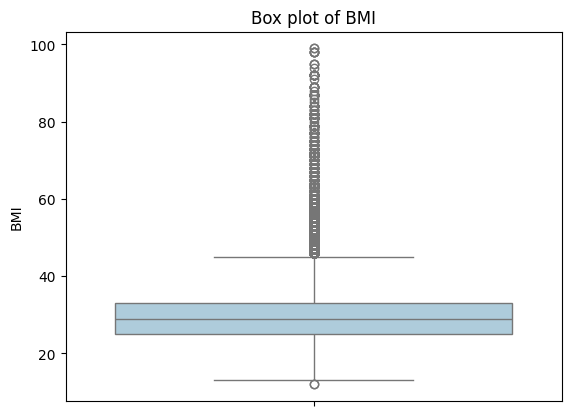

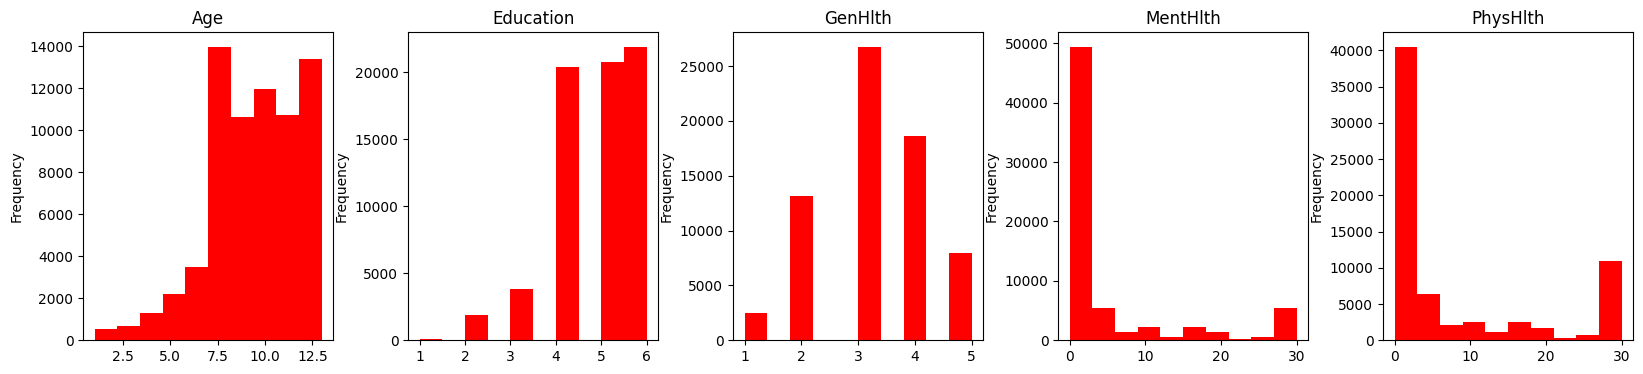

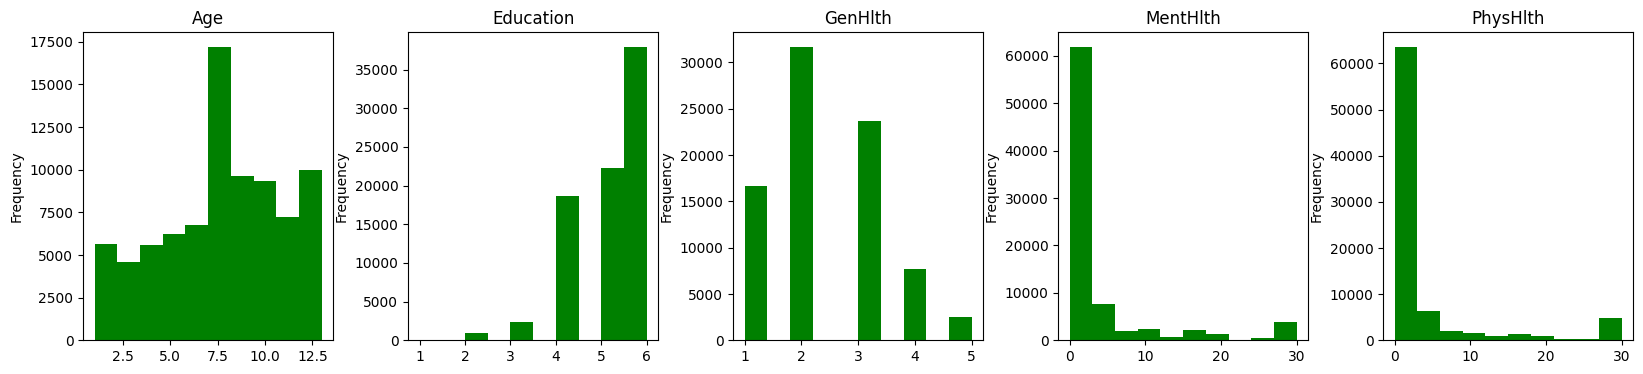

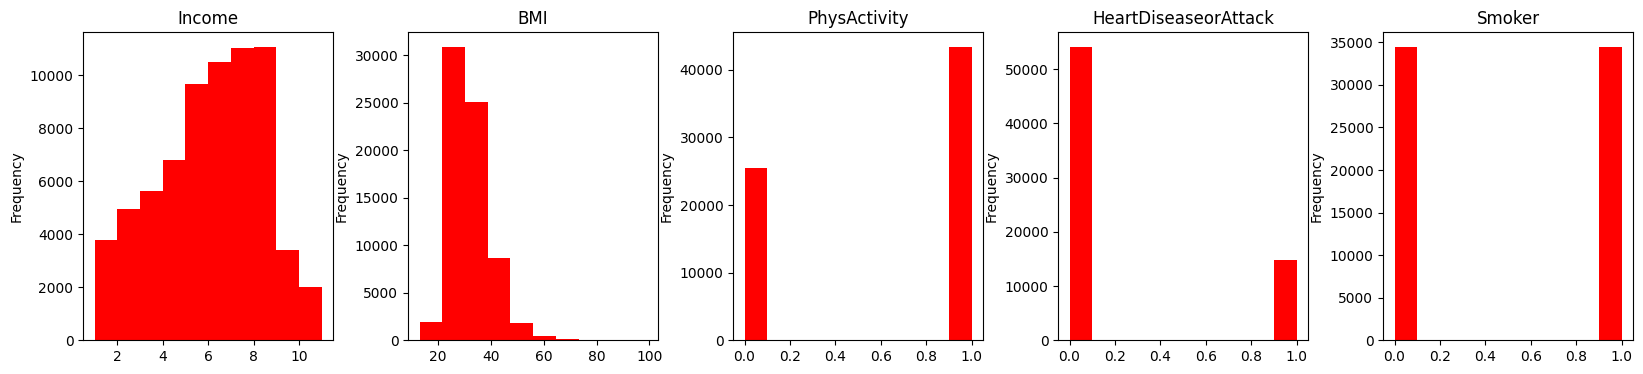

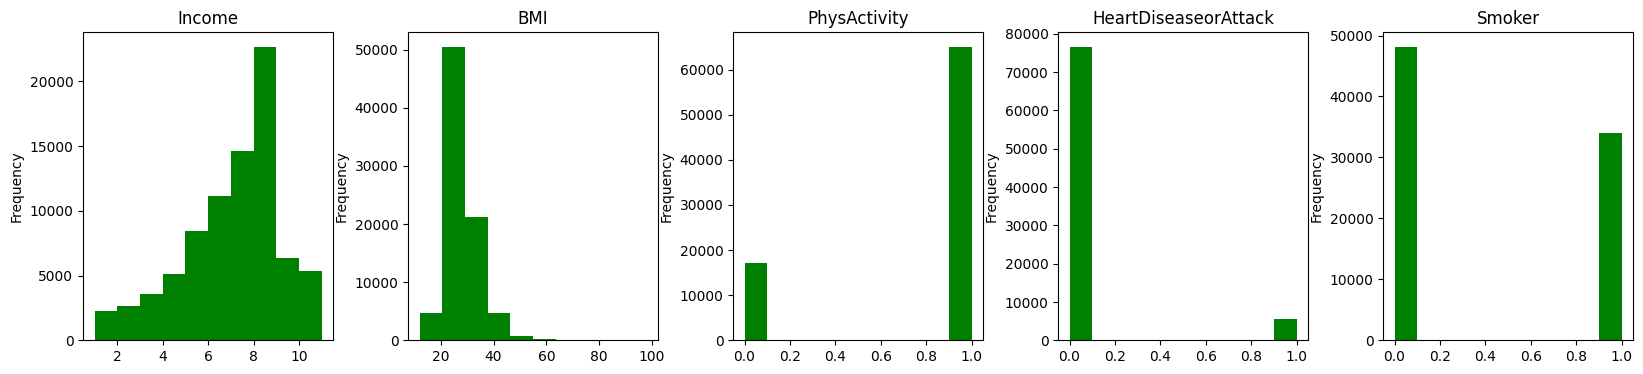

In [ ]:
sns.boxplot(df_brfss['BMI'], ).set(title='Box plot of BMI')
plot_columns(df_brfss[df_brfss['Diabetes'] == 1],  ['Age', 'Education', 'GenHlth', 'MentHlth', 'PhysHlth'], col_count_in_one_row=5, size=(20, 4), color='RED')
plot_columns(df_brfss[df_brfss['Diabetes'] == 0],  ['Age', 'Education', 'GenHlth', 'MentHlth', 'PhysHlth'], col_count_in_one_row=5, size=(20, 4), color='GREEN')
plot_columns(df_brfss[df_brfss['Diabetes'] == 1], ['Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'], col_count_in_one_row=5, size=(20, 4), color='RED')
plot_columns(df_brfss[df_brfss['Diabetes'] == 0], ['Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'], col_count_in_one_row=5, size=(20, 4), color='GREEN')

In [ ]:
import matplotlib.pyplot as plt
import math

def scatter_plot_columns(data, main_col, col_names, col_count_in_one_row=5, size=(20, 8)):
    """
    This menthod will plot dataframes fields in n columns
    """

    total_row = math.ceil(len(col_names)/col_count_in_one_row)
    fig, ax = plt.subplots(total_row, col_count_in_one_row, figsize=size)

    col_index = 0;
    for i in range(total_row):
        for j in range(col_count_in_one_row):
            if col_index >= len(col_names):
                continue
            data.plot.scatter(title = col_names[col_index], x = main_col , y = col_names[col_index], ax=ax[i,j])
            col_index = col_index+1

    plt.subplots_adjust(wspace=0.3,  hspace=0.4)
    plt.show()

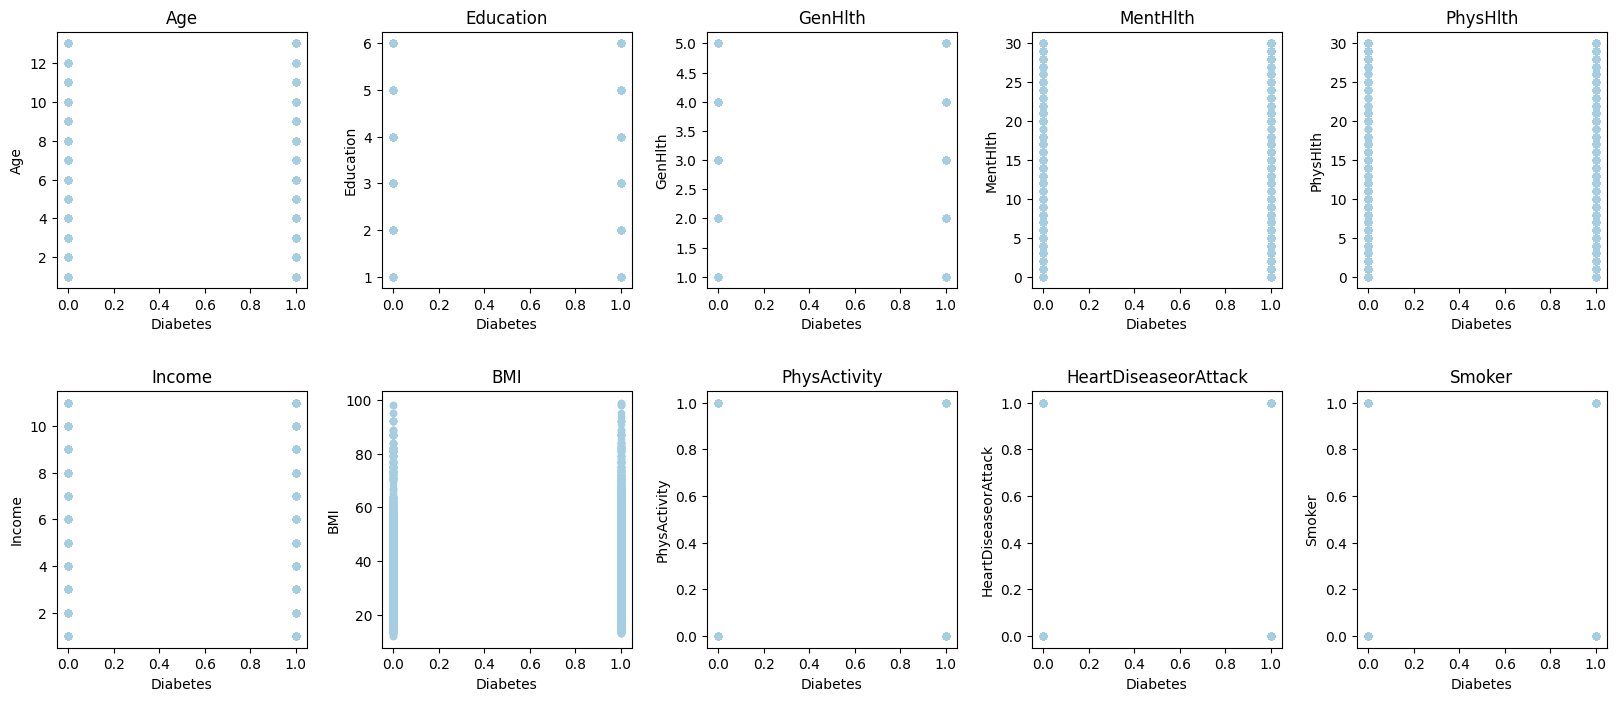

In [ ]:
scatter_plot_columns(df_brfss, 'Diabetes', ['Age', 'Education', 'GenHlth', 'MentHlth',	'PhysHlth', 'Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'])

## Preprocess the data
   - Missing data imputation
   - Outlier detection and imputation
       - multivariate vs univariate
   - Normalise data is required



## Feature engineering
   - Perform multicollinearltiy analysis
   - VIF calculation (VIF > 10, then drop)
   - Feature selection using Lasso regression


Calculated VIF, none of the VIF is > 10, hence no need to drop

In [ ]:
# Diagonal elements in the table
df_brfss_cor = df_brfss.corr()
#pd.DataFrame(np.linalg.inv(df_brfss.corr().values), index = df_brfss_cor.index, columns=df_brfss_cor.columns)

#VIF is not > 10
print(np.diag(np.linalg.inv(df_brfss.corr().values)))

# No Is null values, hence  not imputing anything
print("Number of null values")
print(df_brfss.isnull().sum())

print("Duplicates count")
print(df_brfss.duplicated().sum())

df_brfss.drop_duplicates(inplace=True)

print("Duplicates count after dropping duplicate")
print(df_brfss.duplicated().sum())

print(df_brfss.columns)

# Remove outliers from BMI
cols_to_remove_outlier = ['BMI']
qtr_1 = df_brfss[cols_to_remove_outlier].quantile(0.25)
qtr_3 = df_brfss[cols_to_remove_outlier].quantile(0.75)
IQR = qtr_3 - qtr_1
max_iqr_range = 1.5 # Ideal distribution it 100 percentile will be 1.33 of 75th percentile (100/75), so adding some buffer
df_brfss = df_brfss[~((df_brfss[cols_to_remove_outlier] < (qtr_1 - max_iqr_range * IQR)) | (df_brfss[cols_to_remove_outlier] > (qtr_3 + max_iqr_range * IQR))).any(axis=1)]
df_brfss = df_brfss.drop(df_brfss[df_brfss['BMI'].gt(qtr_3 - 1.2 * IQR) & df_brfss['Diabetes'].eq(0)].index)
#df_brfss = df_brfss[~(((df_brfss['BMI'] < (qtr_1 - 1.1 * IQR)) & df_brfss['Diabetes'] == 0) | ((df_brfss['BMI'] > (qtr_3 + 1.1 * IQR)) & df_brfss['Diabetes'] == 0)).any(axis=1)]


[1.43093092 1.38807326 1.19331577 1.04138253 1.21832497 1.08623434
 1.08519481 1.18732972 1.19232167 1.08968957 1.09499805 1.02724568
 1.1084951  1.13842458 1.91565482 1.24699941 1.65069479 1.55555679
 1.0868552  1.40311905 1.30934188 1.52005969]
Number of null values
Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Duplicates count
4274
Duplicates count after dropping duplicate
0
Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'S

<ipython-input-156-30f54286e29a>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_brfss = df_brfss.drop(df_brfss[df_brfss['BMI'].gt(qtr_3 - 1.2 * IQR) & df_brfss['Diabetes'].eq(0)].index)


<Axes: >

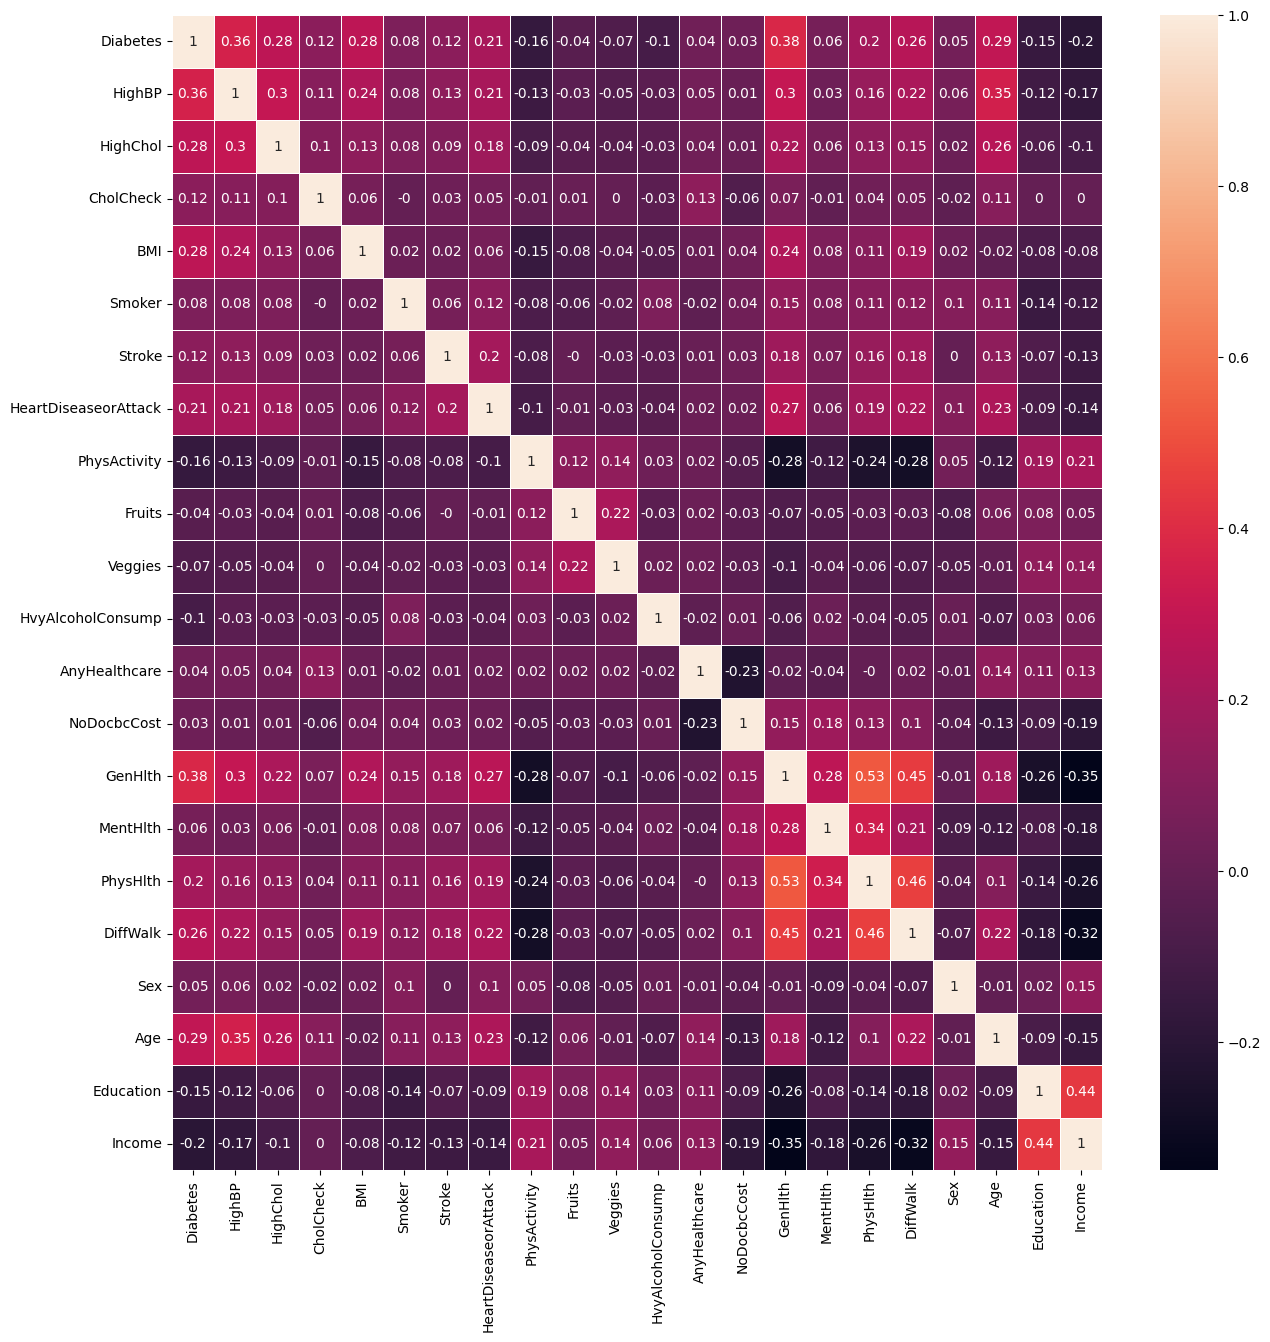

In [ ]:
correlation_matrix = df_brfss.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


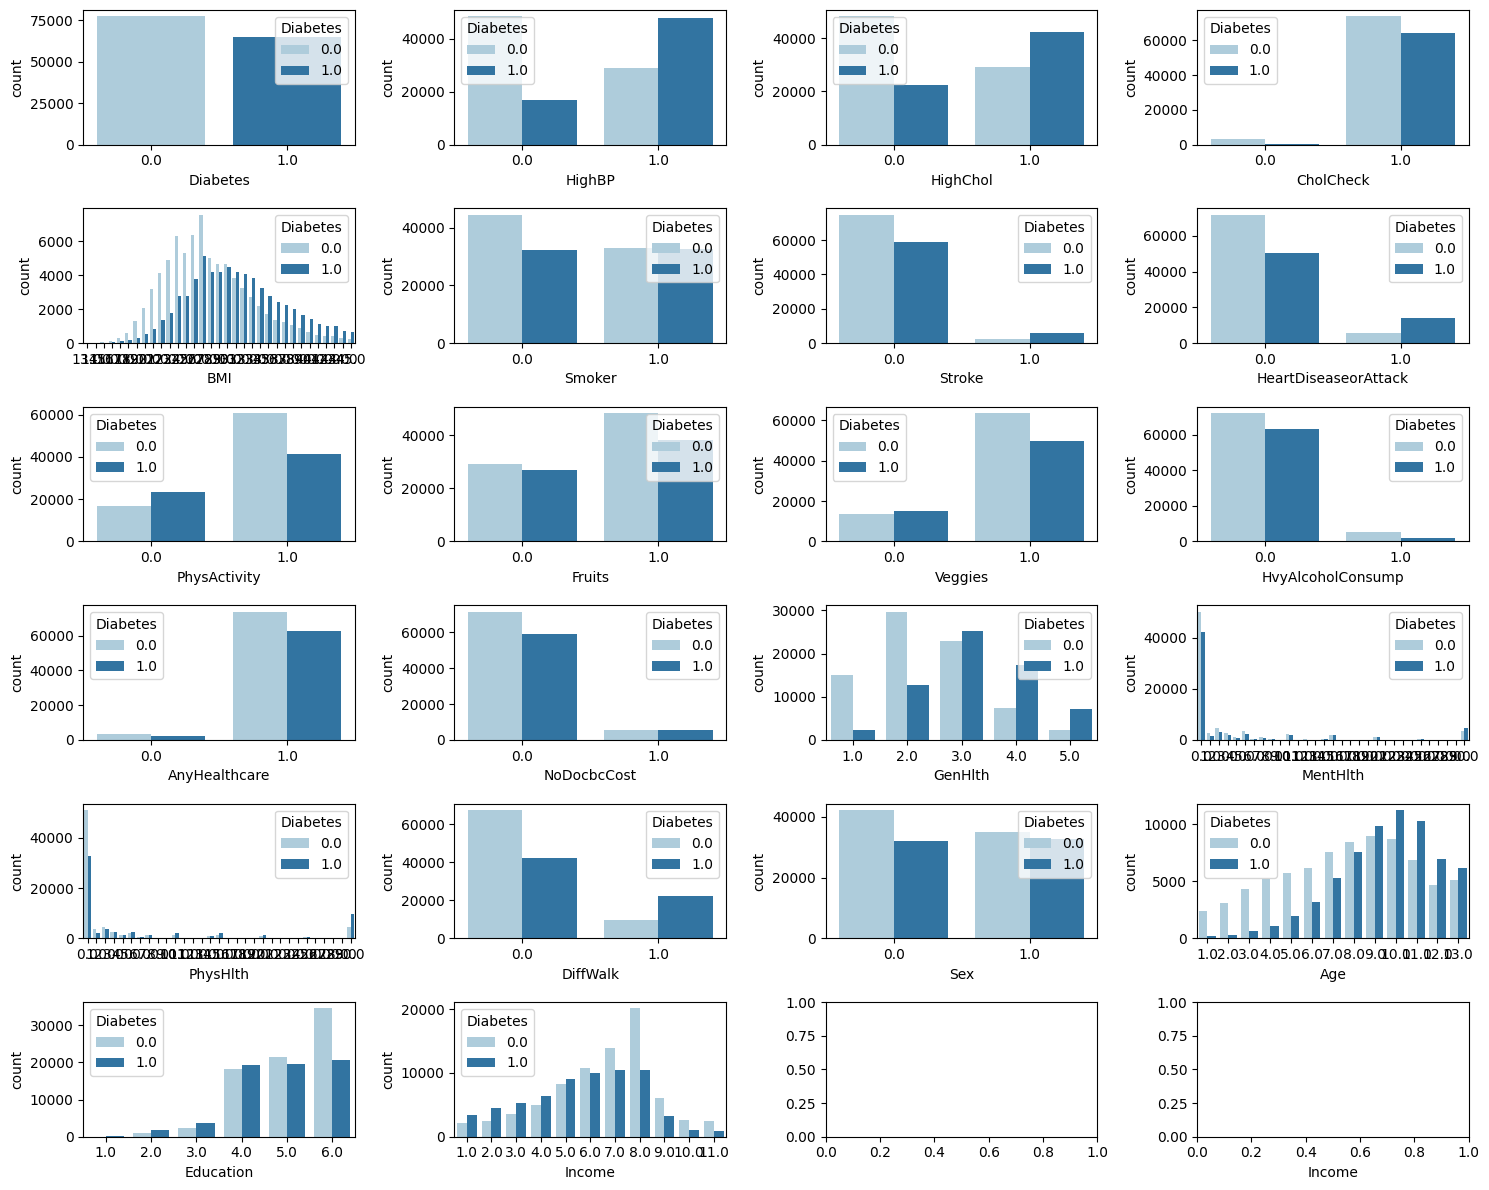

In [ ]:
figure,axes=plt.subplots(nrows=6, ncols=4, figsize=(15, 12))
axes=axes.flatten()
axes_counter=0
for col_name in df_brfss.columns:
    sns.countplot(data=df_brfss, x=col_name, ax=axes[axes_counter], hue='Diabetes')
    plt.xlabel(col_name)
    axes_counter+=1
plt.tight_layout()
plt.show()

Classification to check if we can predict lifestyle factors effect on Diabetes

In [ ]:
#sns.pairplot(df_brfss)

In [ ]:
#Dropping columns: 'Stroke','CholCheck', 'AnyHealthcare' because there is very low variance in these values
print(df_brfss.var())
col=['Stroke','CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'HvyAlcoholConsump']
#df_brfss=df_brfss.drop(col,axis=1)

Diabetes                 0.248044
HighBP                   0.248403
HighChol                 0.249990
CholCheck                0.026217
BMI                     33.155265
Smoker                   0.248516
Stroke                   0.056068
HeartDiseaseorAttack     0.119354
PhysActivity             0.202715
Fruits                   0.238489
Veggies                  0.161084
HvyAlcoholConsump        0.046757
AnyHealthcare            0.038292
NoDocbcCost              0.073710
GenHlth                  1.173615
MentHlth                65.225751
PhysHlth                92.097834
DiffWalk                 0.174771
Sex                      0.249501
Age                      8.976117
Education                1.002360
Income                   5.383375
dtype: float64


In [ ]:
# Feature selection based on importance
from sklearn.ensemble import RandomForestRegressor

x= df_brfss.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]

rfr_model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df_brfss)
rfr_model.fit(x, y)

features = df.columns
importances = rfr_model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

'''
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)
'''

## Exeuction
### RandomForestClassifier

Use RandomForestClassifier to tain the model.

#### Results on unbalanced data

                    Predicted Healthy  Predicted PreDiabetic  Predicted Diabetes
    Not Diabetic             104945                    178                4601
    PreDiabetic                2668                      0                 345
    Diabetic                  16324                     35                3982
                   
                   
         precision    recall  f1-score   support

         0.0       0.85      0.96      0.90    109724
         1.0       0.00      0.00      0.00      3013
         2.0       0.45      0.20      0.27     20341

    accuracy                           0.82    133078
    macro avg       0.43      0.38      0.39    133078
    weighted avg       0.77      0.82      0.78    133078

#### Results on balanced data

                  Predicted Healthy  Predicted Diabetes
    Not Diabetic              13501                6441
    Diabetic                   4677               15748
                  precision    recall  f1-score   support

                 0.0       0.74      0.68      0.71     19942
                 1.0       0.71      0.77      0.74     20425

    accuracy                           0.72     40367
    macro avg       0.73      0.72      0.72     40367
    weighted avg       0.73      0.72      0.72     40367
  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

x= df_brfss.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=40)

model = Pipeline([
  ('transfor', StandardScaler()),
  ('classifier', RandomForestClassifier())
])
model.fit(x_train, y_train)


y_predict = model.predict(x_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=['Not Diabetic', 'Diabetic'], columns=['Predicted Healthy', 'Predicted Diabetes'])
#cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1 , 2]))
#confusion = pd.DataFrame(cm, index=['Not Diabetic', 'PreDiabetic', 'Diabetic'], columns=['Predicted Healthy', 'Predicted PreDiabetic', 'Predicted Diabetes'])

print(confusion)
sns.heatmap(confusion,annot=True,fmt='g')
print(classification_report(y_test, y_predict))

#### Drop 1 feature a time and check which one has best precision

##### Results on unbalanced data

```
{'accuracy': 0.818760426216204, 'feature': 'CholCheck'}
{'HighBP': 0.816198019206781, 'HighChol': 0.8134778100061618, 'CholCheck': 0.818760426216204, 'BMI': 0.8086385428094801, 'Smoker': 0.816926915042306, 'Stroke': 0.8182419333022739, 'HeartDiseaseorAttack': 0.8175130374667489, 'PhysActivity': 0.8168592855317934, 'Fruits': 0.8166263394400276, 'Veggies': 0.8175430950269766, 'HvyAlcoholConsump': 0.8181818181818182, 'AnyHealthcare': 0.818587595244894, 'NoDocbcCost': 0.81857256646478, 'GenHlth': 0.8132298351342822, 'MentHlth': 0.8165286523692872, 'PhysHlth': 0.815469123371256, 'DiffWalk': 0.8176933828281159, 'Sex': 0.8161153609161544, 'Age': 0.8132598926945099, 'Education': 0.8147627707059018, 'Income': 0.8141841626715159}
{'accuracy': 0.8188205413366597, 'feature': 'NoDocbcCost'}
{'HighBP': 0.8154465802010851, 'HighChol': 0.8141390763311742, 'BMI': 0.8084206254978283, 'Smoker': 0.8164685372488315, 'Stroke': 0.8181367318414764, 'HeartDiseaseorAttack': 0.8170396308931605, 'PhysActivity': 0.8168743143119073, 'Fruits': 0.8160777889658697, 'Veggies': 0.8175280662468627, 'HvyAlcoholConsump': 0.817858699409369, 'AnyHealthcare': 0.8186026240250079, 'NoDocbcCost': 0.8188205413366597, 'GenHlth': 0.8129518027021747, 'MentHlth': 0.8164685372488315, 'PhysHlth': 0.8155066953215407, 'DiffWalk': 0.8179338433099386, 'Sex': 0.8154165226408573, 'Age': 0.8137708712183832, 'Education': 0.8146876268053322, 'Income': 0.8141015043808894}
{'accuracy': 0.8178962713596537, 'feature': 'HvyAlcoholConsump'}
{'HighBP': 0.8154390658110281, 'HighChol': 0.8137558424382693, 'BMI': 0.8083154240370309, 'Smoker': 0.8160777889658697, 'Stroke': 0.8174303791761223, 'HeartDiseaseorAttack': 0.8168818287019642, 'PhysActivity': 0.8160627601857557, 'Fruits': 0.8155442672718255, 'Veggies': 0.8167089977306542, 'HvyAlcoholConsump': 0.8178962713596537, 'AnyHealthcare': 0.8176182389275463, 'GenHlth': 0.8122003636964787, 'MentHlth': 0.8152211484993763, 'PhysHlth': 0.8148304002164144, 'DiffWalk': 0.8171222891837869, 'Sex': 0.8155367528817686, 'Age': 0.8127188566104089, 'Education': 0.8138385007288959, 'Income': 0.8133049790348518}
{'accuracy': 0.8175506094170336, 'feature': 'Stroke'}
{'HighBP': 0.8146801124152753, 'HighChol': 0.8133500653751935, 'BMI': 0.8067073445648417, 'Smoker': 0.8154916665414268, 'Stroke': 0.8175506094170336, 'HeartDiseaseorAttack': 0.8160928177459835, 'PhysActivity': 0.8148905153368701, 'Fruits': 0.815093403868408, 'Veggies': 0.8158899292144457, 'AnyHealthcare': 0.8168968574820782, 'GenHlth': 0.8122153924765927, 'MentHlth': 0.8148379146064714, 'PhysHlth': 0.8136356121973579, 'DiffWalk': 0.8164910804190024, 'Sex': 0.8146049685147057, 'Age': 0.8117720434632321, 'Education': 0.8141465907212312, 'Income': 0.8127188566104089}
{'accuracy': 0.8166338538300846, 'feature': 'AnyHealthcare'}
{'HighBP': 0.814356993642826, 'HighChol': 0.8124483385683584, 'BMI': 0.8062189092111394, 'Smoker': 0.8149806880175536, 'HeartDiseaseorAttack': 0.8153639219104585, 'PhysActivity': 0.8144922526638513, 'Fruits': 0.8142593065720856, 'Veggies': 0.8153564075204016, 'AnyHealthcare': 0.8166338538300846, 'GenHlth': 0.8113963239603841, 'MentHlth': 0.8143344504726552, 'PhysHlth': 0.8128541156314342, 'DiffWalk': 0.8159350155547874, 'Sex': 0.8139361877996363, 'Age': 0.8111483490885045, 'Education': 0.8125610544192128, 'Income': 0.811989960774884}
['Diabetes', 'CholCheck', 'NoDocbcCost', 'HvyAlcoholConsump', 'Stroke', 'AnyHealthcare']
```

##### Results on balanced data


```
{'accuracy': 0.726187232145069, 'feature': 'AnyHealthcare'}
{'HighBP': 0.7210840538063269, 'HighChol': 0.7211088265167092, 'CholCheck': 0.7251467783090148, 'BMI': 0.7079792900141204, 'Smoker': 0.7231649614784353, 'Stroke': 0.7250476874674858, 'HeartDiseaseorAttack': 0.7239081427899027, 'PhysActivity': 0.7247008695221344, 'Fruits': 0.721901553248941, 'Veggies': 0.7245770059702232, 'HvyAlcoholConsump': 0.7247256422325167, 'AnyHealthcare': 0.726187232145069, 'NoDocbcCost': 0.7256174598062775, 'GenHlth': 0.7066911090742438, 'MentHlth': 0.7230658706369064, 'PhysHlth': 0.7232145068991999, 'DiffWalk': 0.7247751876532812, 'Sex': 0.7240072336314316, 'Age': 0.7133797408774494, 'Education': 0.7235860975549335, 'Income': 0.7203656452052419}
{'accuracy': 0.7263606411177447, 'feature': 'DiffWalk'}
{'HighBP': 0.7210345083855625, 'HighChol': 0.7201179181014195, 'CholCheck': 0.7244531424183119, 'BMI': 0.7061213367354522, 'Smoker': 0.7231154160576708, 'Stroke': 0.7248742784948101, 'HeartDiseaseorAttack': 0.7232392796095821, 'PhysActivity': 0.7251467783090148, 'Fruits': 0.7212079173582382, 'Veggies': 0.7238338246587559, 'HvyAlcoholConsump': 0.7240320063418139, 'NoDocbcCost': 0.7252210964401615, 'GenHlth': 0.7064681546808036, 'MentHlth': 0.7216290534347363, 'PhysHlth': 0.7227685981123194, 'DiffWalk': 0.7263606411177447, 'Sex': 0.7223226893254391, 'Age': 0.7111501969430475, 'Education': 0.7225456437188793, 'Income': 0.7198206455768326}
{'accuracy': 0.7245026878390765, 'feature': 'NoDocbcCost'}
{'HighBP': 0.7189783734238363, 'HighChol': 0.7184333737954269, 'CholCheck': 0.7234870067134045, 'BMI': 0.7030990660688186, 'Smoker': 0.7223474620358213, 'Stroke': 0.7235613248445513, 'HeartDiseaseorAttack': 0.7223474620358213, 'PhysActivity': 0.7232392796095821, 'Fruits': 0.7219263259593232, 'Veggies': 0.7221988257735279, 'HvyAlcoholConsump': 0.722719052691555, 'NoDocbcCost': 0.7245026878390765, 'GenHlth': 0.7063442911288924, 'MentHlth': 0.7221245076423811, 'PhysHlth': 0.7204151906260063, 'Sex': 0.7205638268882999, 'Age': 0.7095895161889663, 'Education': 0.7210592810959447, 'Income': 0.7190031461342186}
{'accuracy': 0.7236851883964625, 'feature': 'Stroke'}
{'HighBP': 0.7176158743528129, 'HighChol': 0.7191765551068943, 'CholCheck': 0.7224465528773503, 'BMI': 0.7042138380360196, 'Smoker': 0.7213565536205316, 'Stroke': 0.7236851883964625, 'HeartDiseaseorAttack': 0.7220997349319989, 'PhysActivity': 0.7231649614784353, 'Fruits': 0.7195976911833923, 'Veggies': 0.7222235984839102, 'HvyAlcoholConsump': 0.7203656452052419, 'GenHlth': 0.7036688384076102, 'MentHlth': 0.7200435999702728, 'PhysHlth': 0.7209354175440335, 'Sex': 0.720984962964798, 'Age': 0.7062699729977456, 'Education': 0.7198949637079793, 'Income': 0.7171947382763149}
{'accuracy': 0.7226447345604082, 'feature': 'Veggies'}
{'HighBP': 0.7170461020140213, 'HighChol': 0.7177149651943419, 'CholCheck': 0.7210345083855625, 'BMI': 0.7013897490524438, 'Smoker': 0.7211831446478559, 'HeartDiseaseorAttack': 0.7204151906260063, 'PhysActivity': 0.7218767805385587, 'Fruits': 0.7201922362325662, 'Veggies': 0.7226447345604082, 'HvyAlcoholConsump': 0.7219758713800877, 'GenHlth': 0.7041890653256373, 'MentHlth': 0.72078678128174, 'PhysHlth': 0.719969281839126, 'Sex': 0.7220749622216167, 'Age': 0.7085242896425298, 'Education': 0.7184086010850447, 'Income': 0.7181608739812223}
['Diabetes', 'AnyHealthcare', 'DiffWalk', 'NoDocbcCost', 'Stroke', 'Veggies']
```


In [ ]:
def diabetes_classifier(df, features_to_drop):
    x= df.drop(features_to_drop, axis=1)
    y= df["Diabetes"]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=50)
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)


    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)

    report = classification_report(y_test, y_predict, target_names=['Not Diabetic', 'Diabetic'], output_dict=True)
    #report = classification_report(y_test, y_predict, target_names=['Not Diabetic', 'PreDiabetic', 'Diabetic'], output_dict=True)
    return report['accuracy']


cols_to_drop_from_train = ['Diabetes']
# Finding 5 columns to exclude from dataset to improve classifier performance
for x in range(0, 5):
    result = {};
    max_accuracy_after_dropping = { "accuracy" : -1, "feature": "none"};
    for col in df_brfss.columns:
        if col in cols_to_drop_from_train:
            continue
        acc = diabetes_classifier(df_brfss,  [*[col], *cols_to_drop_from_train])
        result[col] = acc
        if (acc > max_accuracy_after_dropping["accuracy"]):
            max_accuracy_after_dropping = { "accuracy" : acc, "feature": col}

    print(max_accuracy_after_dropping)
    print(result)
    cols_to_drop_from_train.append(max_accuracy_after_dropping["feature"])

print(cols_to_drop_from_train)


{'accuracy': 0.7246114841072351, 'feature': 'AnyHealthcare'}
{'HighBP': 0.717944504436828, 'HighChol': 0.7186252875721865, 'CholCheck': 0.7242828301798206, 'BMI': 0.701535283346636, 'Smoker': 0.7209728156251467, 'Stroke': 0.7236959481665806, 'HeartDiseaseorAttack': 0.7238602751302878, 'PhysActivity': 0.7232968683975773, 'Fruits': 0.7211606178693836, 'Veggies': 0.723672472886051, 'HvyAlcoholConsump': 0.7236255223249918, 'AnyHealthcare': 0.7246114841072351, 'NoDocbcCost': 0.723789849288699, 'GenHlth': 0.7086717686276351, 'MentHlth': 0.7221935302126861, 'PhysHlth': 0.7214423212357388, 'DiffWalk': 0.7240480773745246, 'Sex': 0.7210667167472651, 'Age': 0.7129677449645523, 'Education': 0.719892952720785, 'Income': 0.7186252875721865}
{'accuracy': 0.7245410582656463, 'feature': 'HeartDiseaseorAttack'}
{'HighBP': 0.7167707404103479, 'HighChol': 0.7175688999483544, 'CholCheck': 0.7238602751302878, 'BMI': 0.7001502417953894, 'Smoker': 0.7218648762852716, 'Stroke': 0.723789849288699, 'HeartDisease

KeyboardInterrupt: 

## Forward Feature Selection

Now, we will do forward feature selection to select the features to train the model.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

x= df_brfss.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestClassifier()

sfs = SequentialFeatureSelector(model)
sfs.fit(x_train, y_train)

x_train_reduced = sfs.transform(x_train)
print(list(x_train_reduced))


## Conclusion:

Original balances data set has accuracy of .73. However, if we use unbalanced set by merging 2015 and 2021, we get accuracy of .83. Downsampling this datas set using RandomUnderSampler decreases the accuracy to .53.

Next step, use backward and forward feature sampling to validate find features which are not relevant. Also, run Deep Learning algorithm to calculate the accuracy. Another, next step is to try, upsample the pre-diabetic and diabetic. In many balances dataset, pre-diabetic is merged with non-diabetic, this may increase accuracy of model but effectiveness of model in terms of predicting the real world scenario (i.e distinction between, non-diabetic and pre-diabetic is removed).